In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.mosaicplot import mosaic
import sys
from statsmodels.graphics.gofplots import qqplot
from joypy import joyplot 
import squarify 
import plotly.express as px 
from itertools import product
!pip install joypy
!pip install squarify
!pip install plotly

In [2]:
df=pd.read_csv('Islander_data.csv')

In [3]:
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


# Task-1
Finding the correlation between the Age and Diff column

In [4]:
corr = df.age.corr(df.Diff)

print('The Correlation between Age and Diff columns :', corr)

The Correlation between Age and Diff columns : -0.009293328126756114


# Task-2 :

In [5]:
import math
number_of_samples=10000 #R
size_of_sample=20 #n
sample_mean=[]
for i in range(number_of_samples):
    sample_mean.append(np.mean(np.random.choice(df.Diff.values,size_of_sample,replace=False)))
#sample_mean
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
standard_error

0.022563601067710243

0.022563601067710243

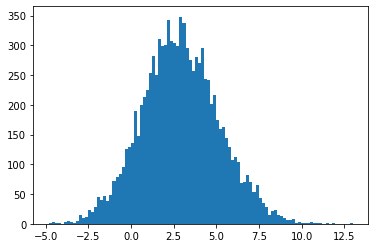

In [6]:
_=plt.hist(sample_mean,bins=100)
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
standard_error

# Task-3 :
Perform Bootstrap on "Diff" with following parameters,
## number_of_samples=10000
## size_of_sample=20,
## Metric = Mean
## What is 95% confidence interval after performing Bootstrap? 
## Write down upper and lower limits.

In [7]:
CI=0.95
sorted_means=np.sort(sample_mean)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : -1.5000000000000004
Upper level : 7.454999999999998


# Task-4 : Create Contingency Table between "Happy_Sad_group"
 (as index) and "Drug" (columns). 
What is the count of Sad (S in index) subjects who are given drug A? 

In [8]:
# df1=df[df.Happy_Sad_group=='S']
# df1=df1[df.]

In [9]:
contingency_table = pd.crosstab(df['Happy_Sad_group'], df['Drug'])

print(contingency_table)

Drug              A   S   T
Happy_Sad_group            
H                33  33  33
S                34  33  32


In [10]:
count = contingency_table.loc['S', 'A']
count

34

In [11]:
df2=df[df.Drug=='A']
df2
# df1[df1.Happy_Sad_group=='S']
# df1.set_index('Happy_Sad_group')
# df1

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
62,Ariane,Steiner,27,S,3,A,54.0,60.0,6.0
63,Naoto,Steiner,39,H,3,A,61.6,88.5,26.9
64,Jade,Summers,40,S,3,A,59.8,79.7,19.9
65,Kevin,Takahashi,34,H,3,A,64.1,90.0,25.9


# Task-5 : Perform "Statistical" Chi-square test on contingency table created in
above question. What is sum of chi-square value and p-value?

In [20]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(contingency_table)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
chisq+pvalue

Observed chi2: 0.0303
p-value: 0.9986


1.0289192296193

In [13]:
contingency_table["column_sum"]=contingency_table.sum(axis=1)
contingency_table

Drug,A,S,T,column_sum
Happy_Sad_group,,,,
H,33,33,33,99
S,34,33,32,99


# Task-6 :

In [14]:
# assuming the contingency table is named contingency_table
row_total = contingency_table.loc['H', :].sum()
col_total = contingency_table.loc[:, 'T'].sum()
total = contingency_table.values.sum()

expected = (row_total * col_total) / total
print(expected)

32.5


In [15]:
# assuming the contingency table is named contingency_table
observed = contingency_table.loc['H', 'T']
expected = (row_total * col_total) / total
residual = (observed - expected) / (expected ** 0.5)

print("Pearson residual for Happy subjects who are given drug T:", residual)


Pearson residual for Happy subjects who are given drug T: 0.08770580193070293


In [16]:
(residual) = (observed - expected) / np.sqrt(expected)
residual

0.08770580193070293

# Task-7 : Perform chi-squared test using "Permutation" method. 
Perform 10000 permutation to get p value. 
What is p value and your conclusion? 


In [17]:
def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        tmp=[]
        for observe in row:
            R=(observe - expect) ** 2 / expect
            tmp.append(R)
        pearson_residuals.append(tmp)
    #print(pearson_residuals)
    X=np.sum(pearson_residuals)
    #print(X)
    return X

In [18]:
H = 99 / 3
S = 1000 - H
expected = [H, S]
chi2observed = chi2(contingency_table.values, expected)

print(f'Observed chi2: {chi2observed:.4f}')

Observed chi2: 3617.5160


In [19]:
import numpy as np
from scipy.stats import chi2_contingency

# assuming the contingency table is named contingency_table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

observed_chi2 = chi2


# assuming the contingency table is named contingency_table
n_permutations = 10000
chi2_values = np.zeros(n_permutations)

observed_table = contingency_table.values
total_obs = observed_table.sum()

for i in range(n_permutations):
    permuted_table = np.random.permutation(observed_table)
    permuted_totals = permuted_table.sum(axis=0)
    permuted_table = permuted_table / permuted_totals * permuted_totals.sum()
    chi2_values[i] = ((permuted_table - observed_table) ** 2 / permuted_table).sum()

p_value = (chi2_values >= observed_chi2).sum() / n_permutations

print("P-value:", p_value)


P-value: 1.0
